# genQC &middot; Generative Quantum Circuits

> Generating quantum circuits with diffusion models

<p align="left">
  <a><img src="https://badgen.net/badge/icon/awesome?icon=awesome&label" alt="awesome"></a>
  <a><img src="https://badgen.net/badge/generative/models/orange" alt="generative-models"></a>
  <a><img src="https://badgen.net/badge/diffusion/models/pink" alt="diffusion-models"></a>
  <a><img src="https://img.shields.io/badge/python-3.10-red" alt="python-3.10"></a>
  <a href="https://doi.org/10.5281/zenodo.10282060"><img src="https://zenodo.org/badge/DOI/10.5281/zenodo.10282060.svg" alt="DOI"></a>
</p>

Code repository for generating quantum circuits with diffusion models. [[Arxiv]](https://arxiv.org/abs/2311.02041) [[Demo]](https://huggingface.co/spaces/Floki00/genQC)

![](https://github.com/FlorianFuerrutter/genQC/blob/main/src/assets/inference.png?raw=true)

## The codebase

The code contained within this repo allows the sampling of pre-trained diffusion models and includes our pipeline to fine-tune and train models from scratch. Pre-trained weights can be found on [Hugging Face](https://huggingface.co/collections/Floki00/generative-quantum-circuits-6550e926c67f60a368b02bc3) and can be downloaded automatically via our code (see minimal example). For the CLIP model weights we use the [OpenCLIP](https://github.com/mlfoundations/open_clip) library, which will download (and cache) the CLIP model on first usage of our pipeline. In case you prefer reading a documentation rather than notebooks or code see [[Documentation]](https://florianfuerrutter.github.io/genQC/).

The repo inlcudes:

1. `genQC/` a full release of our used diffusion pipeline.
2. `src/examples` examples how to reproduce some figures of the [Paper](https://arxiv.org/abs/2311.02041).
3. `src/` the source notebooks for [nbdev](https://github.com/fastai/nbdev).

## Examples

#### Minimal example

A minimal example to generate a 5 qubit circuit conditioned on a SRV of $[1,1,2,2,2]$. You can try it out on your own with our [[Demo]](https://huggingface.co/spaces/Floki00/genQC), no coding required.

In [ ]:
from genQC.pipeline.diffusion_pipeline import DiffusionPipeline
from genQC.inference.infer_srv import generate_srv_tensors, convert_tensors_to_srvs

pipeline = DiffusionPipeline.from_pretrained("Floki00/qc_srv_3to8qubit", "cpu")
pipeline.scheduler.set_timesteps(20) 

out_tensor = generate_srv_tensors(pipeline, "Generate SRV: [1,1,2,2,2]", samples=1, system_size=5, num_of_qubits=5, max_gates=16, g=10) 
qc_list, _, srv_list = convert_tensors_to_srvs(out_tensor, pipeline.gate_pool)

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO]: `genQC.models.unet_qc.QC_Cond_UNet` instantiated from given config on cpu.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder` instantiated from given config on cpu.
[INFO]: `genQC.models.frozen_open_clip.CachedFrozenOpenCLIPEmbedder`. No save_path` provided. No state dict loaded.


Circuit is SRV [1, 1, 2, 2, 2]


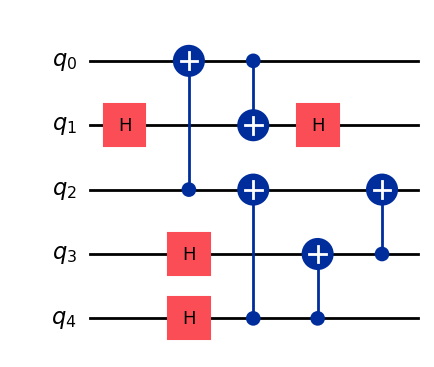

In [ ]:
print(f"Circuit is SRV {srv_list[0]}")
qc_list[0].draw("mpl")

#### Included examples

Example notebooks are provided in the directory `src/examples/`.

- `0_hello_circuit` [[doc]](https://florianfuerrutter.github.io/genQC/examples/hello_circuit.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/0_hello_circuit.ipynb): How to sample a circuit (conditioned on a SRV)
- `1_editing_and_masking` [[doc]](https://florianfuerrutter.github.io/genQC/examples/editing_and_masking.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/1_editing_and_masking.ipynb): Presents editing and masking of circuits
- `2_unitary_compilation` [[doc]](https://florianfuerrutter.github.io/genQC/examples/unitary_compilation.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/2_unitary_compilation.ipynb): Compile unitaries and transpile circuits
- `3_dataset_and_fineTune` [[doc]](https://florianfuerrutter.github.io/genQC/examples/dataset_and_finetune.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/3_dataset_and_fineTune.ipynb): How to create a dataset and fine-tune a pre-trained model

## Installation

The installation of `genQC` is done via `pip` within a few minutes, depending on your downloading speed.

#### Method 1: pip install

To install `genQC` just run:

```sh
pip install genQC
```

Note, this will install missing requirements automatically. You may want to install some of them manually beforehand, e.g. `torch` for specific cuda support, see [pytorch.org/get-started/locally](https://pytorch.org/get-started/locally/).

**Requirements:** `genQC` depends on `python` (min. version 3.10) and the libraries: `torch`, `numpy`, `matplotlib`, `scipy`, `pandas`, `omegaconf`, `qiskit`, `tqdm`, `joblib`, `open_clip_torch`, `ipywidgets`, `pylatexenc` and `huggingface_hub`. All can be installed with `pip`. In `src/RELEASES.md` [[doc]](https://florianfuerrutter.github.io/genQC/RELEASES.html) and the release descriptions specific tested-on versions are listed.

#### Method 2: clone the repository

To use the latest GitHub code you can clone the repository by running: 

```sh
git clone https://github.com/FlorianFuerrutter/genQC.git
cd genQC
```

The library `genQC` is built using jupyter notebooks and [`nbdev`](https://github.com/fastai/nbdev). To install the library use in the clone directory:

```sh
pip install -e .
```

#### Test installation

You can run the provided `0_hello_circuit` [[doc]](https://florianfuerrutter.github.io/genQC/examples/hello_circuit.html) [[notebook]](https://github.com/FlorianFuerrutter/genQC/blob/main/src/examples/0_hello_circuit.ipynb) example to test your installation. On a computer with a moderate GPU this inference example notebook should run under half a minute. 

## License

The code and weights in this repository are licensed under the [Apache License 2.0](https://github.com/FlorianFuerrutter/genQC/blob/main/LICENSE.txt).

## BibTeX

We kindly ask you to cite our paper if any of the previous material was useful for your work.

``` latex
@article{furrutter2024quantum,
  title={Quantum circuit synthesis with diffusion models},
  author={F{\"u}rrutter, Florian and Mu{\~n}oz-Gil, Gorka and Briegel, Hans J},
  journal={Nature Machine Intelligence},
  doi = {https://doi.org/10.1038/s42256-024-00831-9},
  vol = {6},
  pages = {515-–524},
  pages={1--10},
  year={2024},
  publisher={Nature Publishing Group UK London}
}
```